<a href="https://colab.research.google.com/github/cherrrity/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/%EC%97%AC%EB%A6%84%EB%B0%A9%ED%95%99_data_%EC%8A%A4%ED%84%B0%EB%94%94_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인프런 - 캐글 실습으로 배우는 데이터 사이언스**

### **사전 설정**

In [1]:
# 캐글 설문조사 시각화

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
plt.rc('font', family='NanumBarunGothic') 
print(plt.rcParams['font.family'])

['NanumBarunGothic']


In [4]:
# 캐글 연결
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"cherrrity","key":"e8129e2e6bb04050f0dd5ad1fc9c94ef"}'}

In [7]:
ls -1ha kaggle.json

# 대회 data 받기는 안함

SyntaxError: ignored

### 2017 Kaggle ML and Data Science survey Data

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
question = pd.read_csv('/content/schema.csv')
question.shape

(290, 3)

In [11]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [12]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [14]:
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [15]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [16]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

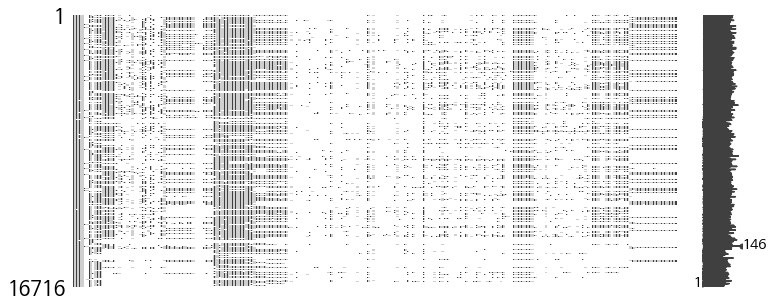

In [19]:
import missingno as msno
# nan으로 나와 있는 칼럼들을 표시해 줌

msno.matrix(mcq, figsize=(12, 5))

### 설문 통계

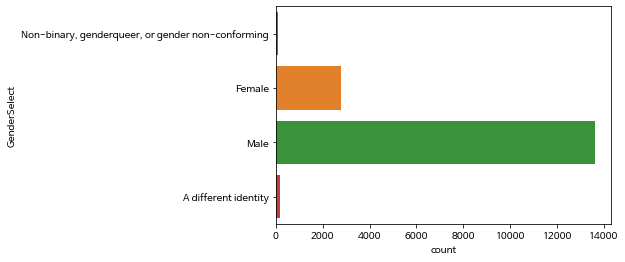

In [20]:
# 성별

sns.countplot(y='GenderSelect', data = mcq)


In [22]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())

# country 칼럼을 인덱스로 지정해주고 국가에 추가
con_df['국가'] = con_df.index

# 칼럼의 순서대로 응답 수, 국가로 컬럼명을 지정해서 만들어줌
con_df.columns = ['응답 수', '국가']

#index 칼럼을 삭제하고 순위를 알기위해 reset_index()를 해줌
con_df = con_df.reset_index().drop('index', axis = 1)

con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [23]:
# 연령 정보

mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

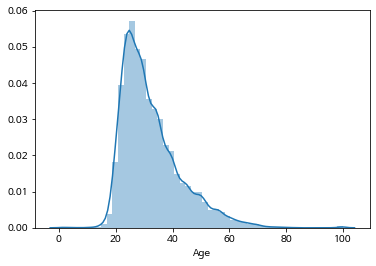

In [25]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

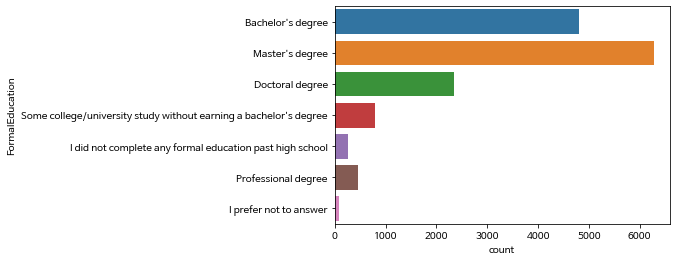

In [26]:
#학력

sns.countplot(y='FormalEducation', data = mcq)

In [27]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())

# normalize=True 가 비율
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)

mcq_major_df.columns = ['응답 수', '비율']

mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


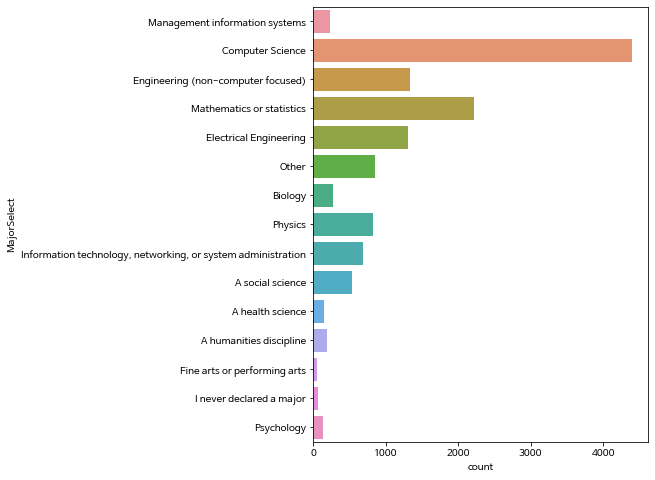

In [28]:
#재학중인 사람들의 전공 현황

plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

In [29]:
# 취업 여부
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())

# normalize=True 가 비율
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))

mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)

mcq_es_df.columns = ['응답 수', '비율']

mcq_es_df 


,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


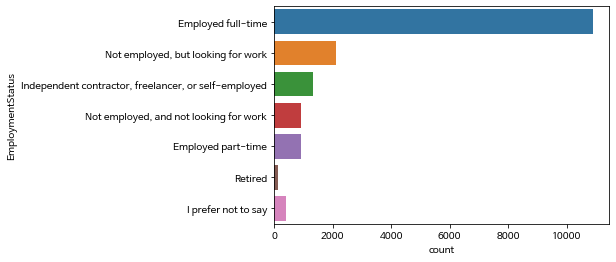

In [30]:
sns.countplot(y="EmploymentStatus", data=mcq)

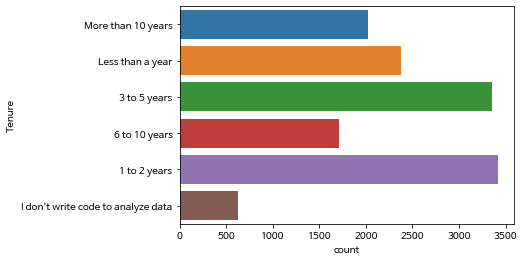

In [31]:
# 프로그래밍 경험

sns.countplot(y="Tenure", data=mcq)

The number of interviewees in Korea : 194


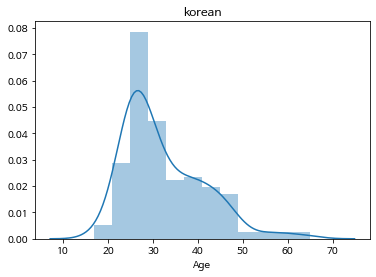

In [32]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print("The number of interviewees in Korea : " + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('korean')
plt.show()

In [33]:
# 성별로 한국인을 나눳을 때

pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

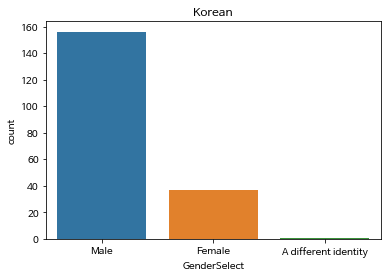

In [34]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

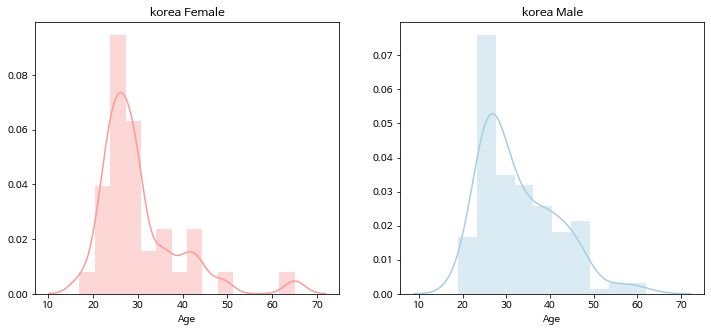

In [39]:
# 한국인 성별 별 나이 대

figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4], ax = ax1)
ax1.title.set_text('korea Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0], ax = ax2)
ax2.title.set_text('korea Male')

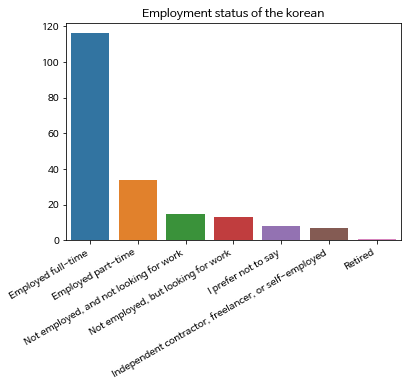

In [41]:
# 직업 상태 

sns.barplot(x=korea['EmploymentStatus'].unique(), y = korea["EmploymentStatus"].value_counts())

plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

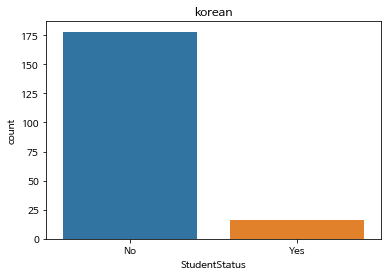

In [42]:
#학생인지 아닌지

korea['StudentStatus'] = korea['StudentStatus'].fillna("No")
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

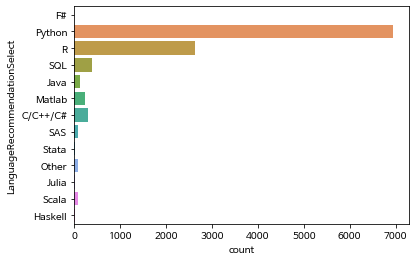

In [43]:
# python 과 R 중 어떤 언어를 배워야 하는지?

sns.countplot(y="LanguageRecommendationSelect", data=mcq)